<a href="https://colab.research.google.com/github/iamdas3/Machine-Learning/blob/master/Zappos_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip \
    -O /tmp/footwear.zip

--2020-06-21 04:21:36--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.120.116
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.120.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘/tmp/footwear.zip’

/tmp/footwear.zip   100%[===================>] 291.18M  24.8MB/s    in 13s     

2020-06-21 04:21:49 (23.2 MB/s) - ‘/tmp/footwear.zip’ saved [305323328/305323328]



In [ ]:
import os
import zipfile

local_zip = '/tmp/footwear.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
boot_dir = os.path.join('/tmp/ut-zap50k-images/Boots')
sandals_dir = os.path.join('/tmp/ut-zap50k-images/Sandals')
shoes_dir = os.path.join('/tmp/ut-zap50k-images/Shoes')
slippers_dir = os.path.join('/tmp/ut-zap50k-images/Slippers')

In [ ]:
import shutil

for root, dirs, files in os.walk(boot_dir):  # replace the . with your starting directory
   for file in files:
      path_file = os.path.join(root,file)
      shutil.move(path_file,boot_dir)

shutil.rmtree('/tmp/ut-zap50k-images/Boots/Ankle', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Boots/Knee High', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Boots/Mid-Calf', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Boots/Over the Knee', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Boots/Prewalker Boots', ignore_errors=True)

In [ ]:
for root, dirs, files in os.walk(sandals_dir):  # replace the . with your starting directory
   for file in files:
      path_file = os.path.join(root,file)
      shutil.move(path_file,sandals_dir)

shutil.rmtree('/tmp/ut-zap50k-images/Sandals/Athletic', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Sandals/Flat', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Sandals/Heel', ignore_errors=True)

In [ ]:
for root, dirs, files in os.walk(shoes_dir):  # replace the . with your starting directory
   for file in files:
      path_file = os.path.join(root,file)
      shutil.move(path_file,shoes_dir)

shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Boat Shoes', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Clogs and Mules', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Crib Shoes', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Firstwalker', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Flats', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Heels', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Loafers', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Oxfords', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Prewalker', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Shoes/Sneakers and Athletic Shoes', ignore_errors=True)

In [ ]:
for root, dirs, files in os.walk(slippers_dir):  # replace the . with your starting directory
   for file in files:
      path_file = os.path.join(root,file)
      shutil.move(path_file,slippers_dir)

shutil.rmtree('/tmp/ut-zap50k-images/Slippers/Boot', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Slippers/Slipper Flats', ignore_errors=True)
shutil.rmtree('/tmp/ut-zap50k-images/Slippers/Slipper Heels', ignore_errors=True)

In [ ]:
print('Total Boots images:', len(os.listdir(boot_dir)))
print('Total Sandals images:', len(os.listdir(sandals_dir)))
print('Total Shoes images:', len(os.listdir(shoes_dir)))
print('Total Slippers images:', len(os.listdir(slippers_dir)))

Total Boots images: 12832
Total Sandals images: 5741
Total Shoes images: 30169
Total Slippers images: 1283


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (100, 100, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()


--2020-06-21 04:34:34--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  63.8MB/s    in 1.3s    

2020-06-21 04:34:35 (63.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                              

In [ ]:
last_layer = pre_trained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(4, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


last layer output shape:  (None, 4, 4, 768)


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = "/tmp/ut-zap50k-images/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/test-images/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=500
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=100,
  classes=['Boots', 'Sandals', 'Shoes', 'Slippers']
)


Found 50025 images belonging to 4 classes.
Found 164 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=100, validation_data = validation_generator, verbose = 1, validation_steps=2)

Epoch 1/25
100/100 [==============================] - 166s 2s/step - loss: 3.1484 - accuracy: 0.6856 - val_loss: 0.7798 - val_accuracy: 0.7073
Epoch 2/25
100/100 [==============================] - 165s 2s/step - loss: 0.5507 - accuracy: 0.7904 - val_loss: 0.9223 - val_accuracy: 0.7256
Epoch 3/25
100/100 [==============================] - 164s 2s/step - loss: 0.4499 - accuracy: 0.8342 - val_loss: 0.7365 - val_accuracy: 0.7683
Epoch 4/25
100/100 [==============================] - 164s 2s/step - loss: 0.4054 - accuracy: 0.8505 - val_loss: 0.7763 - val_accuracy: 0.7256
Epoch 5/25
100/100 [==============================] - 163s 2s/step - loss: 0.3641 - accuracy: 0.8655 - val_loss: 1.1253 - val_accuracy: 0.6585
Epoch 6/25
100/100 [==============================] - 165s 2s/step - loss: 0.3584 - accuracy: 0.8670 - val_loss: 0.9487 - val_accuracy: 0.7317
Epoch 7/25
100/100 [==============================] - 164s 2s/step - loss: 0.3396 - accuracy: 0.8736 - val_loss: 0.9396 - val_accuracy: 0.7561

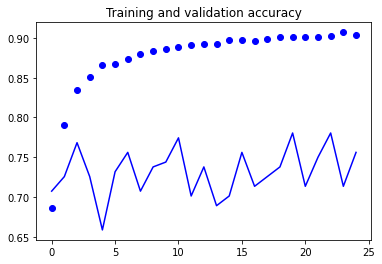

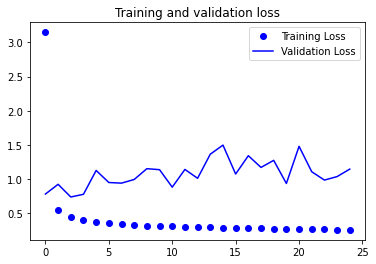

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save("Zappos_validation.h5")

In [ ]:
model.save_weights(
    "Zappos", overwrite=True, save_format=None
)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving 001.jpeg to 001.jpeg
Saving 002.jpeg to 002.jpeg
Saving 003.jpeg to 003.jpeg
Saving 004.jpeg to 004.jpeg
Saving 005.jpeg to 005.jpeg
Saving 006.jpeg to 006.jpeg
Saving 007.jpeg to 007.jpeg
Saving 008.jpeg to 008.jpeg
Saving 009.jpeg to 009.jpeg
Saving 010.jpeg to 010.jpeg
Saving 011.jpeg to 011.jpeg
Saving 012.jpeg to 012.jpeg
Saving 013.jpeg to 013.jpeg
Saving 014.jpeg to 014.jpeg
Saving 015.jpeg to 015.jpeg
001.jpeg
[[0. 0. 1. 0.]]
002.jpeg
[[0. 0. 1. 0.]]
003.jpeg
[[0. 0. 1. 0.]]
004.jpeg
[[0. 0. 1. 0.]]
005.jpeg
[[0. 0. 1. 0.]]
006.jpeg
[[0. 0. 1. 0.]]
007.jpeg
[[0. 0. 1. 0.]]
008.jpeg
[[0. 0. 1. 0.]]
009.jpeg
[[0. 0. 1. 0.]]
010.jpeg
[[0. 0. 1. 0.]]
011.jpeg
[[0. 0. 1. 0.]]
012.jpeg
[[0. 0. 1. 0.]]
013.jpeg
[[0. 0. 1. 0.]]
014.jpeg
[[1.0000000e+00 0.0000000e+00 1.8789414e-19 0.0000000e+00]]
015.jpeg
[[0. 0. 1. 0.]]
